In [56]:
# All the csvs we are reading in has exactly 25 rows
# every 5 row correspond to a particular (# of function, # of DE) combination.
# Which gives us 20 different combos in total.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up list for API numbers
block_num_list = ["5", "10", "50", "100"]

# Set labels for the x-axis
num_DE = ["10", "100", "500", "1000", "5000"]

# set_up median overhead array for all number of APIs
med_array_all = []

In [57]:
for block_num in block_num_list:
    num_func_name = "block" + block_num
    input_file_path = num_func_name + ".csv"
    output_figure_path = num_func_name + ".png"
    raw_df = pd.read_csv(input_file_path, header=None)
    raw_arr = np.array(raw_df).reshape(5, 5, 5)
    med_array = []
    for i in range(5):
        cur_med = np.median(raw_arr[i], axis=0)
        med_array.append(cur_med)
    med_array = np.transpose(med_array)
    # Transform the med_array: we only want to keep three components of overhead
    # 1) get accessible DE, 2) start execution environment, 3) others
    med_array[0] = med_array[0]+med_array[3]+med_array[4]
    med_array = med_array[:3]
    med_array_all.append(med_array)
    # fig, ax = plt.subplots()
    # ax.bar(num_DE, med_array[1], label='Get accessible DE')
    # ax.bar(num_DE, med_array[2], bottom=med_array[1], label='Start exec environment')
    # ax.bar(num_DE, med_array[0], bottom=med_array[1]+med_array[2], label='Others')
    # ax.legend()
    # plt.savefig(output_figure_path, facecolor='w')

In [58]:
med_array_all[0]

array([[0.01284146, 0.01312494, 0.01220274, 0.01416993, 0.01742697],
       [0.01038527, 0.01500583, 0.0501101 , 0.23166251, 0.63064003],
       [0.00501943, 0.00571108, 0.01616359, 0.05676699, 0.17300344]])

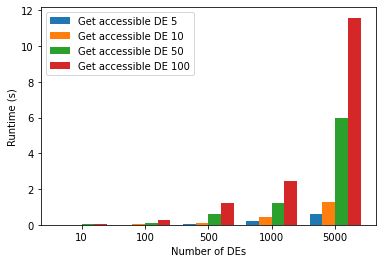

In [60]:
# fig, ax = plt.subplots()
# for i in range(len(med_array_all)):
#     ax.bar(num_DE, med_array_all[i][1], label='Get accessible DE')
#     ax.bar(num_DE, med_array_all[i][2], bottom=med_array_all[i][1], label='Start exec environment')
#     ax.bar(num_DE, med_array_all[i][0], bottom=med_array_all[i][1]+med_array_all[i][2], label='Others')
# ax.legend()
# plt.savefig("test.png", facecolor='w')
num_DE_axis = np.arange(len(num_DE))

plt.bar(num_DE_axis-0.3, med_array_all[0][1], label='Get accessible DE 5', width=0.2)
plt.bar(num_DE_axis-0.1, med_array_all[1][1], label='Get accessible DE 10', width=0.2)
plt.bar(num_DE_axis+0.1, med_array_all[2][1], label='Get accessible DE 50', width=0.2)
plt.bar(num_DE_axis+0.3, med_array_all[3][1], label='Get accessible DE 100', width=0.2)

plt.xticks(num_DE_axis, num_DE)
plt.xlabel("Number of DEs")
plt.ylabel("Runtime (s)")
plt.legend()
plt.savefig("test.png", facecolor='w')